In [8]:
"""
Natural Language Processing
"""
!pip install pywaffle
!pip install spacy
!pip install plotnine
!pip install great_tables
!pip install wordcloud
!pip install nltk


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: C:\Users\dmarin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


  Using cached spacy-3.8.2-cp311-cp311-win_amd64.whl (12.2 MB)
  Using cached murmurhash-1.0.11-cp311-cp311-win_amd64.whl (25 kB)
  Using cached preshed-3.0.9-cp311-cp311-win_amd64.whl (122 kB)
  Using cached thinc-8.3.2-cp311-cp311-win_amd64.whl (1.5 MB)
  Using cached srsly-2.4.8-cp311-cp311-win_amd64.whl (479 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
  Using cached weasel-0.4.1-py3-none-any.whl (50 kB)
  Using cached typer-0.15.1-py3-none-any.whl (44 kB)
  Using cached pydantic-2.10.3-py3-none-any.whl (456 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl (182 kB)
  Using cached language_data-1.3.0-py3-none-any.whl (5.4 MB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
  Using cached blis-1.0.1-cp311-cp311-win_amd64.whl (6.3 MB)
  Using cached confection-0.1.5-py3-none-any.whl (35 kB)
  Using cached click-8.1.7-py3-none-any.whl (97 kB)
  Using cached rich-13.9.4-py3-none-any.whl (242 kB)
  Using cached cloudpathlib-0.20.0-py3-none-any.whl (52 kB)


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: C:\Users\dmarin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: C:\Users\dmarin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: C:\Users\dmarin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: C:\Users\dmarin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


     ---------------------------------------- 1.5/1.5 MB 6.8 MB/s eta 0:00:00
     ------------------------------------- 274.1/274.1 kB 17.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: C:\Users\dmarin\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
# # Intro: Nettoyer et structurer l’information dans les données textuelles

# # Data Comte de Monte Cristo
from urllib import request

url = "https://www.gutenberg.org/files/17989/17989-0.txt"
response = request.urlopen(url)
raw = response.read().decode("utf8")

dumas = raw.split(
    "*** START OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[1].split(
    "*** END OF THE PROJECT GUTENBERG EBOOK LE COMTE DE MONTE-CRISTO, TOME I ***"
)[
    0
]

import re


def clean_text(text):
    text = text.lower()  # mettre les mots en minuscule
    text = " ".join(text.split())
    return text


dumas = clean_text(dumas)

dumas[10000:10500]

" mes yeux. --vous avez donc vu l'empereur aussi? --il est entré chez le maréchal pendant que j'y étais. --et vous lui avez parlé? --c'est-à-dire que c'est lui qui m'a parlé, monsieur, dit dantès en souriant. --et que vous a-t-il dit? --il m'a fait des questions sur le bâtiment, sur l'époque de son départ pour marseille, sur la route qu'il avait suivie et sur la cargaison qu'il portait. je crois que s'il eût été vide, et que j'en eusse été le maître, son intention eût été de l'acheter; mais je lu"

,Text,Author,ID
Id,,,
id26305,"This process, however, afforded me no means of...",EAP,26305
id17569,It never once occurred to me that the fumbling...,HPL,17569
id11008,"In his left hand was a gold snuff box, from wh...",EAP,11008
id27763,How lovely is spring As we looked from Windsor...,MWS,27763
id12958,"Finding nothing else, not even gold, the Super...",HPL,12958


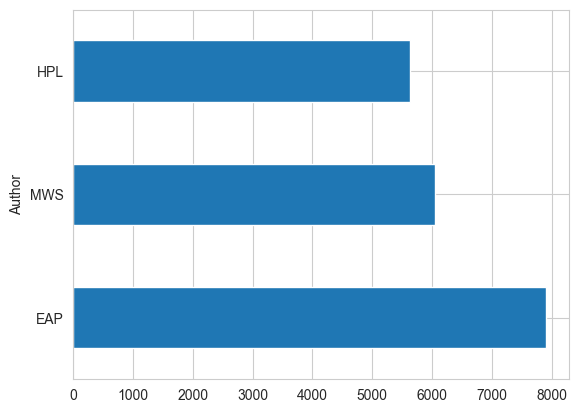

In [5]:
# # Data corpus anglo saxon:
"""
Edgar Allan Poe, (EAP) ;
HP Lovecraft (HPL) ;
Mary Wollstonecraft Shelley (MWS).
"""
import pandas as pd

url = "https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv"
# 1. Import des données
horror = pd.read_csv(url, encoding="latin-1")
# 2. Majuscules aux noms des colonnes
horror.columns = horror.columns.str.capitalize()
# 3. Retirer le prefixe id
horror["ID"] = horror["Id"].str.replace("id", "")
horror = horror.set_index("Id")
(horror.value_counts("Author").plot(kind="barh"))
horror.head()

In [6]:
# # Exercice 1: Analyses de fréquence
# 1.1. Compter le nombre de phrase pour chaque auteur avec fear
def nb_occurrences(word, train_data):
    train_data["wordtoplot"] = train_data["Text"].str.contains(word).astype(int)
    table = train_data.groupby("Author").sum(numeric_only=True)
    data = table.to_dict()["wordtoplot"]
    return table


table = nb_occurrences("fear", horror)
table.head()

,wordtoplot
Author,
EAP,70
HPL,160
MWS,211


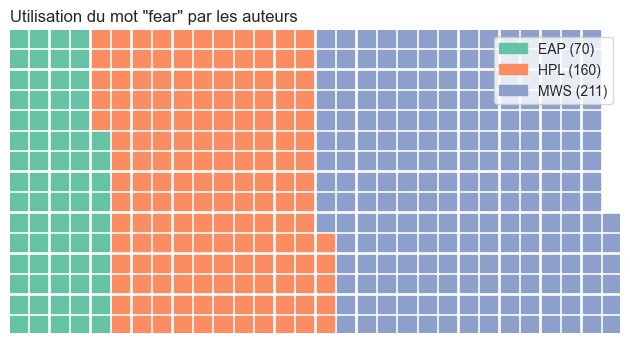

In [7]:
# # 1.2 Résumé du nb d'occurence du mot "fear"
import matplotlib.pyplot as plt
from pywaffle import Waffle


def graph_occurrence(word, train_data):
    table = nb_occurrences(word, train_data)
    data = table.to_dict()["wordtoplot"]
    fig = plt.figure(
        FigureClass=Waffle,
        rows=15,
        values=data,
        title={
            "label": 'Utilisation du mot "%s" par les auteurs' % word,
            "loc": "left",
        },
        labels=[f"{k} ({v})" for k, v in data.items()],
    )
    return fig


fig = graph_occurrence("fear", horror)

In [9]:
# # 1.3 Transformation d'un texte en tokens
import nltk

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("genesis")
nltk.download("wordnet")
nltk.download("omw-1.4")

!python -m spacy download fr_core_news_sm
!python -m spacy download en_core_web_sm

from nltk.tokenize import word_tokenize

word_tokenize(dumas[10000:10500])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\genesis.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
C:\Python310\python.exe: No module named spacy
C:\Python310\python.exe: No module named spacy


['mes',
 'yeux',
 '.',
 '--',
 'vous',
 'avez',
 'donc',
 'vu',
 "l'empereur",
 'aussi',
 '?',
 '--',
 'il',
 'est',
 'entré',
 'chez',
 'le',
 'maréchal',
 'pendant',
 'que',
 'j',
 "'",
 'y',
 'étais',
 '.',
 '--',
 'et',
 'vous',
 'lui',
 'avez',
 'parlé',
 '?',
 '--',
 "c'est-à-dire",
 'que',
 "c'est",
 'lui',
 'qui',
 'm',
 "'",
 'a',
 'parlé',
 ',',
 'monsieur',
 ',',
 'dit',
 'dantès',
 'en',
 'souriant',
 '.',
 '--',
 'et',
 'que',
 'vous',
 'a-t-il',
 'dit',
 '?',
 '--',
 'il',
 'm',
 "'",
 'a',
 'fait',
 'des',
 'questions',
 'sur',
 'le',
 'bâtiment',
 ',',
 'sur',
 "l'époque",
 'de',
 'son',
 'départ',
 'pour',
 'marseille',
 ',',
 'sur',
 'la',
 'route',
 "qu'il",
 'avait',
 'suivie',
 'et',
 'sur',
 'la',
 'cargaison',
 "qu'il",
 'portait',
 '.',
 'je',
 'crois',
 'que',
 "s'il",
 'eût',
 'été',
 'vide',
 ',',
 'et',
 'que',
 "j'en",
 'eusse',
 'été',
 'le',
 'maître',
 ',',
 'son',
 'intention',
 'eût',
 'été',
 'de',
 "l'acheter",
 ';',
 'mais',
 'je',
 'lu']

In [10]:
# # Tokenizer:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("fr_core_news_sm")
doc = nlp(dumas[10000:10500])

text_tokenized = []
for token in doc:
    text_tokenized += [token.text]

", ".join(text_tokenized)

OSError: [E050] Can't find model 'fr_core_news_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [11]:
# # 3.3 Nuage de mots
from collections import Counter

doc = nlp(dumas[:30000])

# Extract tokens, convert to lowercase and filter out punctuation and spaces
tokens = [
    token.text.lower() for token in doc if not token.is_punct and not token.is_space
]

# Count the frequency of each token
token_counts = Counter(tokens)
print('len(token_counts): {:,}'.format(len(token_counts)))

token_count_all = list(token_counts.items())

# Create a DataFrame from the list of tuples
token_count_all = pd.DataFrame(token_count_all, columns=["word", "count"])

NameError: name 'nlp' is not defined

In [ ]:
# # Distribution de la fréquence des mots

from plotnine import *

(ggplot(token_count_all) + geom_histogram(aes(x="count")) + scale_x_log10())

In [ ]:
from great_tables import GT, md
import polars as pl

# Sort the tokens by frequency in descending order
sorted_token_counts = token_counts.most_common(25)
sorted_token_counts = pd.DataFrame(sorted_token_counts, columns=["word", "count"])


def create_bar(prop_fill: float, max_width: int, height: int) -> str:
    """Create divs to represent prop_fill as a bar."""
    width = round(max_width * prop_fill, 2)
    px_width = f"{width}px"
    return f"""\
    <div style="width: {max_width}px; background-color: lightgrey;">\
        <div style="height:{height}px;width:{px_width};background-color:green;"></div>\
    </div>\
    """


sorted_token_counts["count_pct"] = (
    sorted_token_counts["count"] / sorted_token_counts["count"].max()
)

df = (
    pl.from_pandas(sorted_token_counts)
    .with_columns(
        pl.col("count_pct")
        .map_elements(lambda x: create_bar(x, max_width=75, height=20))
        .alias("count_pct_bar")
    )
    .with_columns(
        pl.col("count_pct").map_elements(lambda x: f"__{x}__").alias("count_pct")
    )
)

(
    GT(df)
    .cols_hide("count_pct")
    .cols_label(**{"count_pct_bar": "", "word": "Mot", "count": "Nombre d'occurrences"})
    .tab_source_note(
        md(
            "_Nombre d'apparitions sur les 30 000 premiers caractères du Comte de Monte Cristo_"
        )
    )
    .fmt_markdown("word")
)

(
    ggplot(sorted_token_counts, aes(x="word", y="count"))
    + geom_point(stat="identity", size=3, color="red")
    + scale_x_discrete(limits=sorted_token_counts.sort_values("count")["word"].tolist())
    + coord_flip()
    + theme_minimal()
    + labs(title="Word Frequency", x="Word", y="Count")
)

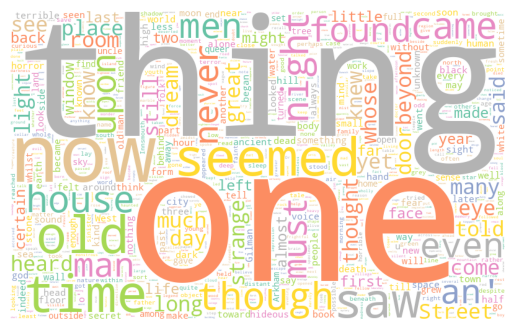

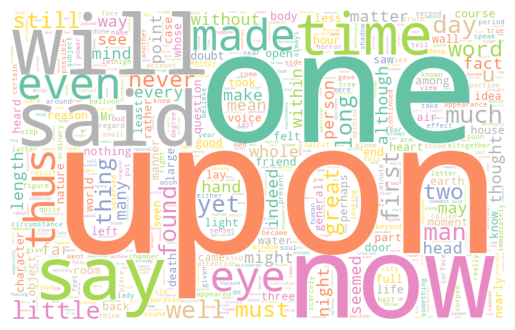

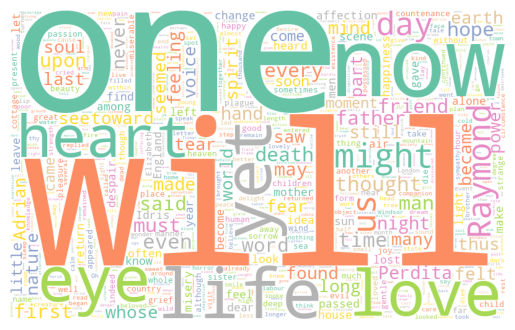

In [13]:
# # Exercice 3: Wordcloud

from wordcloud import WordCloud


# 3.1. Wordclouds trois auteurs anglo saxons
def graph_wordcloud(author, train_data, varname="Text"):
    txt = train_data.loc[train_data["Author"] == author, varname]
    all_text = " ".join([text for text in txt])
    wordcloud = WordCloud(
        width=800,
        height=500,
        random_state=21,
        max_words=2000,
        background_color="white",
        colormap="Set2",
    ).generate(all_text)
    return wordcloud


n_topics = ["HPL", "EAP", "MWS"]

for i in range(len(n_topics)):
    wordcloud = graph_wordcloud(n_topics[i], horror)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

(np.float64(-0.5), np.float64(1429.5), np.float64(783.5), np.float64(-0.5))

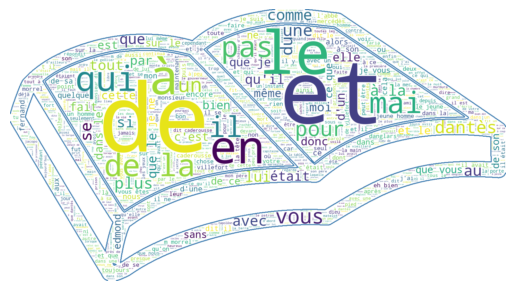

In [14]:
# # Wordcloud Dumas

import wordcloud
import numpy as np
import io
import requests
import PIL
import matplotlib.pyplot as plt

img = "https://minio.lab.sspcloud.fr/lgaliana/generative-art/pythonds/book.png"
book_mask = np.array(PIL.Image.open(io.BytesIO(requests.get(img).content)))


def make_wordcloud(corpus):
    wc = wordcloud.WordCloud(
        background_color="white",
        max_words=2000,
        mask=book_mask,
        contour_width=3,
        contour_color="steelblue",
    )
    wc.generate(corpus)
    return wc


wordcloud_dumas = make_wordcloud(dumas)
plt.imshow(wordcloud_dumas, interpolation="bilinear")
plt.axis("off")

C:\Users\dmarin\AppData\Local\Temp\ipykernel_18896\543368801.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


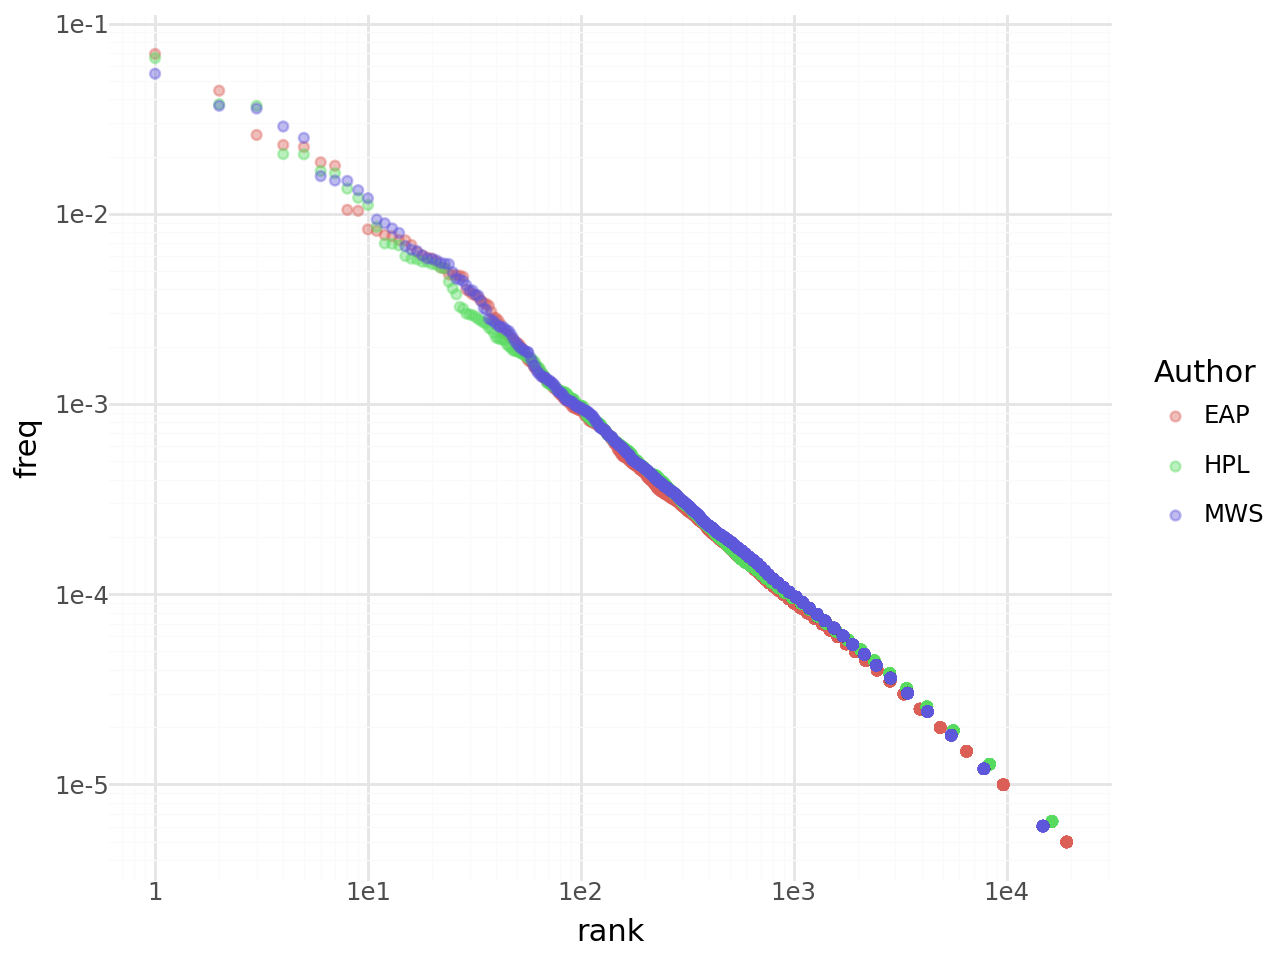

In [16]:
# # Relation rang frequence d'un mot: Loi de Zipf
from plotnine import *

count_words = pd.DataFrame(
    {
        "counter": horror.groupby("Author")
        .apply(lambda s: " ".join(s["Text"]).split())
        .apply(lambda s: Counter(s))
        .apply(lambda s: s.most_common())
        .explode()
    }
)
count_words[["word", "count"]] = pd.DataFrame(
    count_words["counter"].tolist(), index=count_words.index
)
count_words = count_words.reset_index()

count_words = count_words.assign(
    tot_mots_auteur=lambda x: (x.groupby("Author")["count"].transform("sum")),
    freq=lambda x: x["count"] / x["tot_mots_auteur"],
    rank=lambda x: x.groupby("Author")["count"].transform("rank", ascending=False),
)


g = (
    ggplot(count_words)
    + geom_point(aes(y="freq", x="rank", color="Author"), alpha=0.4)
    + scale_x_log10()
    + scale_y_log10()
    + theme_minimal()
)
g

In [17]:
# # Formalisation de la relation:
import statsmodels.api as sm
import numpy as np

exog = sm.add_constant(np.log(count_words["rank"].astype(float)))

model = sm.GLM(
    count_words["freq"].astype(float), exog, family=sm.families.Poisson()
).fit()

# Afficher les résultats du modèle
print(model.summary())

"""
==> Le coefficient de la régression est presque 1 ce qui suggère bien une relation quasiment log-linéaire entre le rang et la fréquence d’occurrence d’un mot. Dit autrement, le mot le plus utilisé l’est deux fois plus que le deuxième mot le plus fréquent qui l’est trois plus que le troisième, etc. On retrouve bien empiriquement cette loi sur ce corpus de trois auteurs.
"""

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   freq   No. Observations:                69301
Model:                            GLM   Df Residuals:                    69299
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.011
Date:                Mon, 09 Dec 2024   Deviance:                     0.065676
Time:                        18:00:51   Pearson chi2:                   0.0656
No. Iterations:                     5   Pseudo R-squ. (CS):          0.0002431
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4388      1.089     -2.239      0.0

In [18]:
# # 4. Nettoyage de texte:

# # 4.1: Retrait des stop words
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

", ".join(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [19]:
# # Version `SpaCy`:
nlp_english = spacy.load("en_core_web_sm")
stop_words_english = nlp_english.Defaults.stop_words
", ".join(stop_words_english)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [20]:
# # Français:
", ".join(stopwords.words("french"))

'au, aux, avec, ce, ces, dans, de, des, du, elle, en, et, eux, il, ils, je, la, le, les, leur, lui, ma, mais, me, même, mes, moi, mon, ne, nos, notre, nous, on, ou, par, pas, pour, qu, que, qui, sa, se, ses, son, sur, ta, te, tes, toi, ton, tu, un, une, vos, votre, vous, c, d, j, l, à, m, n, s, t, y, été, étée, étées, étés, étant, étante, étants, étantes, suis, es, est, sommes, êtes, sont, serai, seras, sera, serons, serez, seront, serais, serait, serions, seriez, seraient, étais, était, étions, étiez, étaient, fus, fut, fûmes, fûtes, furent, sois, soit, soyons, soyez, soient, fusse, fusses, fût, fussions, fussiez, fussent, ayant, ayante, ayantes, ayants, eu, eue, eues, eus, ai, as, avons, avez, ont, aurai, auras, aura, aurons, aurez, auront, aurais, aurait, aurions, auriez, auraient, avais, avait, avions, aviez, avaient, eut, eûmes, eûtes, eurent, aie, aies, ait, ayons, ayez, aient, eusse, eusses, eût, eussions, eussiez, eussent'

In [21]:
# # Version `SpaCy`:
stop_words_french = nlp.Defaults.stop_words
", ".join(stop_words_french)

NameError: name 'nlp' is not defined

In [22]:
# # Reprise des analyses de texte sans les stop words
del clean_text


def clean_text(doc):
    # Tokenize, remove stop words and punctuation, and lemmatize
    cleaned_tokens = [
        token.lemma_ for token in doc if not token.is_stop and not token.is_punct
    ]
    # Join tokens back into a single string
    cleaned_text = " ".join(cleaned_tokens)
    return cleaned_text

# Process the text with spaCy
doc = nlp(dumas[:30000], disable=["ner", "textcat"])

# Clean the text
cleaned_dumas = clean_text(doc)
wordcloud_dumas_nostop = make_wordcloud(cleaned_dumas)

NameError: name 'nlp' is not defined

In [33]:
# # 4.2 Racinisation et lemmatisation
import nltk

nltk.download("wordnet")
nltk.download("omw-1.4")

dumas[1030:1200]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


"naples. comme d'habitude, un pilote côtier partit aussitôt du port, rasa le château d'if, et alla aborder le navire entre le cap de morgion et l'île de rion. aussitôt, co"

In [34]:
# # Version racinisée:

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language="french")

stemmed = [stemmer.stem(word) for word in word_tokenize(dumas[1030:1200])]
",".join(stemmed)

"napl,.,comm,d'habitud,,,un,pilot,côti,part,aussitôt,du,port,,,ras,le,château,d'if,,,et,alla,abord,le,navir,entre,le,cap,de,morgion,et,l'îl,de,rion,.,aussitôt,,,co"

In [36]:
# # Version lemmatisée:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

for word in ["women", "daughters", "leaves"]:
    print(f"The lemmatized form of {word} is: {lemm.lemmatize(word)}")
    
# # Version Dumas:
lemmatizer = WordNetLemmatizer()

lemmatized = [lemmatizer.lemmatize(word) for word in word_tokenize(dumas[1030:1200])]
", ".join(lemmatized)

The lemmatized form of women is: woman
The lemmatized form of daughters is: daughter
The lemmatized form of leaves is: leaf


"naples, ., comme, d'habitude, ,, un, pilote, côtier, partit, aussitôt, du, port, ,, rasa, le, château, d'if, ,, et, alla, aborder, le, navire, entre, le, cap, de, morgion, et, l'île, de, rion, ., aussitôt, ,, co"

In [37]:
"""
Analyse fréquentiste par l'approche Bags of words
"""
import spacy
import pandas as pd
import numpy as np

# # Rechargement des données:

url = "https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv"
# 1. Import des données
horror = pd.read_csv(url, encoding="latin-1")
# 2. Majuscules aux noms des colonnes
horror.columns = horror.columns.str.capitalize()
# 3. Retirer le prefixe id
horror["ID"] = horror["Id"].str.replace("id", "")
horror = horror.set_index("Id")

# Function to clean the text
def clean_text(doc):
    # Tokenize, remove stop words and punctuation, and lemmatize
    cleaned_tokens = [
        token.lemma_ for token in doc if not token.is_stop and not token.is_punct
    ]
    # Join tokens back into a single string
    cleaned_text = " ".join(cleaned_tokens)
    return cleaned_text

nlp_english = spacy.load("en_core_web_sm")
stopwords = nlp_english.Defaults.stop_words
docs = nlp_english.pipe(horror["Text"])
cleaned_texts = [clean_text(doc) for doc in docs]
horror["preprocessed_text"] = cleaned_texts

# # 2.3 Exemple:
# Documents d'exemple
documents = [
    "Le corbeau et le renard",
    "Rusé comme un renard",
    "Le chat est orange comme un renard",
]


# Tokenisation
def preprocess(doc):
    return doc.lower().split()


tokenized_docs = [preprocess(doc) for doc in documents]


# Term frequency (TF)
def term_frequency(term, tokenized_doc):
    term_count = tokenized_doc.count(term)
    return term_count / len(tokenized_doc)


# Inverse document frequency (DF)
def document_frequency(term, tokenized_docs):
    return sum(1 for doc in tokenized_docs if term in doc)


# Calculate inverse document frequency (IDF)
def inverse_document_frequency(word, corpus):
    # Normalisation avec + 1 pour éviter la division par zéro
    count_of_documents = len(corpus) + 1
    count_of_documents_with_word = sum([1 for doc in corpus if word in doc]) + 1
    idf = np.log10(count_of_documents / count_of_documents_with_word) + 1
    return idf


# Calculate TF-IDF scores in each document
def tf_idf_term(term):
    tf_idf_scores = pd.DataFrame(
        [
            [
                term_frequency(term, doc),
                inverse_document_frequency(term, tokenized_docs),
            ]
            for doc in tokenized_docs
        ],
        columns=["TF", "IDF"],
    )
    tf_idf_scores["TF-IDF"] = tf_idf_scores["TF"] * tf_idf_scores["IDF"]
    return tf_idf_scores

tf_idf_term("chat")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# # Exercice 6: TF-IDF: calcul de fréquence
from sklearn.feature_extraction.text import TfidfVectorizer

# # 6.1. TfIdf de scikit

tfidf = TfidfVectorizer(stop_words=list(stopwords))
tfidf


In [ ]:
tfs = tfidf.fit_transform(horror["Text"])

feature_names = tfidf.get_feature_names_out()
corpus_index = [n for n in list(tfidf.vocabulary_.keys())]
horror_dense = pd.DataFrame(tfs.todense(), columns=feature_names)

horror_dense.head()

In [ ]:
# # 6.2. Lignes où les termes de abandon sont non nuls.
tempdf = horror_dense.loc[(horror_dense.filter(regex="abandon") != 0).any(axis=1)]
print(tempdf.index)
tempdf.head(5)

In [ ]:
# # 6.3. 50 extraits avec le TF-IDF le plus élevé.
list_fear = horror_dense["fear"].sort_values(ascending=False).head(n=50).index.tolist()
(horror.iloc[list_fear].agg({"Text": "count"}).sort_values(ascending=False))

In [ ]:
# # 6.4. Les 10 scores les plus élevés
horror.iloc[list_fear[:9]]["Text"].tolist()

In [39]:
# # Les n-grams:


nltk.download("genesis")
nltk.corpus.genesis.words("english-web.txt")

eap_clean = horror.loc[horror["Author"] == "EAP"]
eap_clean = " ".join(eap_clean["Text"])
tokens = eap_clean.split()
print(tokens[:10])
text = nltk.Text(tokens)
print(text)



['This', 'process,', 'however,', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the']
<Text: This process, however, afforded me no means of...>


[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\dmarin\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!


In [40]:
# # Exercice 7: n-grams et contexte du mot fear

from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# # 7.1. Methode concordance
print("Exemples d'occurences du terme 'fear' :")
text.concordance("fear")
print("\n")

Exemples d'occurences du terme 'fear' :
Displaying 13 of 13 matches:
d quick unequal spoken apparently in fear as well as in anger. What he said wa
hutters were close fastened, through fear of robbers, and so I knew that he co
to details. I even went so far as to fear that, as I occasioned much trouble, 
years of age, was heard to express a fear "that she should never see Marie aga
ich must be entirely remodelled, for fear of serious accident I mean the steel
 my arm, and I attended her home. 'I fear that I shall never see Marie again.'
clusion here is absurd. "I very much fear it is so," replied Monsieur Maillard
bt of ultimately seeing the Pole. "I fear you are right there," said the Prefe
er occurred before.' Indeed I had no fear on her account. For a moment there w
erhaps so," said I; "but, Legrand, I fear you are no artist. It is my firm int
 raps with a hammer. Be of heart and fear nothing. My daughter, Mademoiselle M
e splendor. I have not the slightest fear for the result. The 

In [ ]:
# # 7.2. Modélisation des meilleures collocations
bcf = BigramCollocationFinder.from_words(text)
bcf.nbest(BigramAssocMeasures.likelihood_ratio, 20)

In [41]:
# # 7.3. Modélisation des meilleures collocations (qui apparaissent 5+)
finder = nltk.BigramCollocationFinder.from_words(text)
finder.apply_freq_filter(5)
bigram_measures = nltk.collocations.BigramAssocMeasures()
collocations = finder.nbest(bigram_measures.jaccard, 15)

for collocation in collocations:
    c = " ".join(collocation)
    print(c)

"Gad Fly"
'Hum Drum,'
'Rowdy Dow,'
Brevet Brigadier
BarriÃ¨re du
ugh ugh
Ourang Outang
Chess Player
John A.
A. B.
hu hu
General John
'Oppodeldoc,' whoever
mille, mille,
Brigadier General


In [42]:
# # 7.4. collocations du mot fear
bigram_measures = nltk.collocations.BigramAssocMeasures()


def collocations_word(word="fear"):
    # Ngrams with a specific name
    name_filter = lambda *w: word not in w
    # Bigrams
    finder = BigramCollocationFinder.from_words(
        nltk.corpus.genesis.words("english-web.txt")
    )
    # only bigrams that contain 'fear'
    finder.apply_ngram_filter(name_filter)
    # return the 100 n-grams with the highest PMI
    print(finder.nbest(bigram_measures.likelihood_ratio, 100))


collocations_word("fear")

[('fear', 'of'), ('fear', 'God'), ('I', 'fear'), ('the', 'fear'), ('The', 'fear'), ('fear', 'him'), ('you', 'fear')]
